# Анализ коммерческой деятельности медицинской организации

Автор исследования: Д. Оглоблин.  
@ogloblin_de  
ogloblin.de@yandex.ru

## Описание проекта.  


В нашем распоряжении датасет с информацией об коммерческой деятельности медицинского центра в 2021 - 2022 годах.

Описание данных:

- record_id - уникальный идентификатор строки данных;
- service_date - дата оказания медицинской услуги;
- service_name - наименование медицинской услуги;
- service_number - количество услуг;
- service_amount - сумма выплат (стоимость оказанных услуг в рублях);
- insured - уникальный идентификатор пациента;
- sex_id - пол пациента;
- age_for_service_date - возраст пациента.

**Цель исследования:**  
Провести анализ коммерческой деятельности медицинской клиники в 2022 году относительно 2021 года.  

**План проведения исследования:**  
- Базовый анализ данных
- Подготовка данных
- Исследовательский анализ данных
  - Подсчет выручки за 2021 и 2022 годы
  - Оценка влияния внутренних факторов на выручку
  - Оценка влияния внешних факторов на выручку
  - Исследование структуры и динамики выручки
  - Анализ ассортимента медицинских услуг
- Общий вывод по результатам исследования


## Базовый анализ данных  


In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [153]:
# Отключим представление чисел в экспоненциальной форме
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [154]:
df = pd.read_excel('/content/data_test_task_2022.xlsx')

In [155]:
# Рассмотрим общую информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


In [156]:
# Посмотрим количество пропусков.
df.isna().sum()

record_id                0
service_date             0
service_name             0
service_amount           0
service_number           0
insured                  0
sex_id                  21
age_for_service_date     0
dtype: int64

In [157]:
# Посмотрим на процент пропущенных значений
df.isna().mean().sort_values(ascending=False)

sex_id                 0.0
record_id              0.0
service_date           0.0
service_name           0.0
service_amount         0.0
service_number         0.0
insured                0.0
age_for_service_date   0.0
dtype: float64

Пропущенных значений в колонке `sex_id` всего 21 или 0,025% от общего количества.

In [158]:
# Посмотрим, бросятся ли нам в глаза аномальные значения (отрицательные или нулевые) у количественных переменных
df.describe()

,record_id,service_amount,service_number,insured,sex_id,age_for_service_date
count,85369.0,85369.0,85369.0,85369.0,85348.0,85369.0
mean,31799826572.2,1166.1,1.0,654916.3,1.6,33.9
std,837064983.0,799.1,0.2,262335.6,0.5,12.1
min,30268157003.0,147.0,1.0,125073.0,1.0,0.0
25%,31111934803.0,550.0,1.0,509690.0,1.0,27.0
50%,31814131003.0,1155.0,1.0,651895.0,2.0,34.0
75%,32511163303.0,1530.0,1.0,822728.0,2.0,41.0
max,33178147203.0,26999.0,16.0,1306795.0,2.0,83.0


Цены подозрений не вызывают - стоимость услуг варьируется от 147 до 26 999 руб.  
Максимальное количество оказанных услуг за одно посещение - 16. Теоретически, это возможно, но лучше проверить, какие именно услуги были оказаны.  
Минимальный возраст пациентов равен нулю. Требуется рассмотреть подробнее, действительно ли это грудные дети, либо ошибка в данных.  
Максимальный возраст - 83 года. Без подозрений.

In [159]:
df.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое исследование ( риноцитограмма)",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зева с определением чувствительности к антибиотикам",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26


### Резюме подраздела.  

- В нашем датасете 8 колонок и 85369 строк.  
- Названия колонок оформлены корректно.  
- В колонке `sex_id` есть 21 пропущенное значение. Это всего 0,025% от общего количества.   
- Данные приведены с 01 января 2021 по 31 августа 2022 г. Т.е., имеем данные  за неполный 2022 год..
- Потребуется изменить тип данных в колонке `service_date` на `datetime64`.  
- Пол пациентов представлен в виде цифрового значения. Для упрощения и большей наглядности нашего дальнейшего анализа потребуется изменить его на текст `male / female`.  
- Максиальное количество оказанных медицинских услуг за одно посещение - 16 (требуется перепроверить).  
- Минимальный возраст пациента - 0 (требуется перепроверить).

## Предварительная обработка данных

### Проверим возможные аномалии.  

Рассмотрим, нормально ли, что возраст некоторых поциентов - 0. Для этого определим, обслуживает ли медицинский центр детей. Выведем количество пациентов в возрасте до 10 лет.

In [160]:
df_kids = df[df['age_for_service_date'] <= 10]
df_kids['age_for_service_date'].value_counts()

3     688
7     583
2     524
4     523
10    510
6     500
9     484
5     480
8     452
0     402
1     401
Name: age_for_service_date, dtype: int64

Видим, что медицинский центр активно обслуживает в том числе и детей разных возрастов. Предположение об аномальных данных не подтвердилось.  


Рассмотрим записи с количеством услуг = 16.

In [161]:
df[df['service_number'] == 16]

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
36313,31680597403,2021-11-20,Постановка кожных аллергопроб (за 1 единицу),3840,16,544906,1.0,31
37567,31680727103,2021-11-25,Постановка кожных аллергопроб (за 1 единицу),3840,16,734530,2.0,43


Видим, что таких процедур было проведено две разным пациентам. Фактически эта процедура представляет собой постановку 16 единиц кожных аллергопроб. Аномалии нет.

### Проверим и исправим дубликаты.

In [162]:
# Проверим наличие явных дубликатов.
print('Явных строк-дубликатов:', df.duplicated().sum())

Явных строк-дубликатов: 0


Проверим неявные дубликаты в колонке с категориальными значениями.  
Сразу же удалим возможные лишние пробелы до и после наименований мед. процедур, а также приведем их к нижнему регистру.  Составим список уникальных наименований услуг и оценим их первоначальное количество.

In [163]:
df['service_name'] = df['service_name'].str.strip().str.lower()
unique_values = df['service_name'].sort_values().unique().tolist()
print('Всего уникальных наименований медицинских услуг:', len(unique_values))

Всего уникальных наименований медицинских услуг: 875


Внимательно просмотрев этот список, видим, что с 2022 года в наименованиях приемов стали указывать специализацию врача. Несмотря на такую конекртизацию, цена приема не отличается. Можем расценить это как неявный дубликат. Удалим специализацию врачей и оставим в подобных случаях только наименования "прием первичный", "прием повторный" и "прием главного специалиста, врача - эксперта".

Помимо этого воcпользуемся помощью расстояния Левенштейна и найдем наиболее похожие друг на друга названия мед. процедур.

In [164]:
pip install fuzzywuzzy

In [165]:
pip install python-Levenshtein

In [166]:
from fuzzywuzzy import fuzz

In [167]:
unique_values = df['service_name'].unique().tolist()
list_t = []
list_k = []
list_levenstein = []

for t in unique_values:
    index_t = unique_values.index(t)
    for k in unique_values[index_t + 1:]:
        list_t.append(t)
        list_k.append(k)
        list_levenstein.append(fuzz.token_sort_ratio(t, k))

data = list(zip(list_t, list_k, list_levenstein))
df_service_name = pd.DataFrame(data, columns=['name1', 'name2', 'levenstein'])
pd.set_option('display.max_colwidth', None)
df_service_name.loc[df_service_name['levenstein'] > 99].sort_values(by='levenstein', ascending=False)

,name1,name2,levenstein
35664,прием рефлексотерапевта повторный,"прием рефлексотерапевта, повторный",100
57783,прием рефлексотерапевта первичный,"прием рефлексотерапевта, первичный",100
79130,"перевязка чистая (менее 4 см,кв.)",перевязка чистая (менее 4 кв.см.),100
79309,"перевязка чистая (менее 4 см,кв.)","перевязка чистая (менее 4 кв,см.)",100
129044,прием мануального терапевта первичный,"прием мануального терапевта, первичный",100
166640,прием мануального терапевта повторный,"прием мануального терапевта, повторный",100
249336,"перевязка чистая (более 4 см,кв.)",перевязка чистая (более 4 кв.см.),100
359762,перевязка чистая (менее 4 кв.см.),"перевязка чистая (менее 4 кв,см.)",100
364208,перевязка гнойных ран (менее 4 кв.см.),"перевязка гнойных ран (менее 4 кв,см.)",100
381423,"прием врача эндокринолога, руководителя направления блох с.п","прием врача эндокринолога, руководителя направления блох с,п",100


Избавимся от обнаруженных неявных дубликатов.

In [168]:
duplicates = {'перевязка чистая (более 4 см,кв.)': 'перевязка чистая (более 4 кв.см.)', 'перевязка гнойных ран (менее 4 кв,см.)': 'перевязка гнойных ран (менее 4 кв.см.)',
              'перевязка чистая (более 4 кв.см..)': 'перевязка чистая (более 4 кв.см.)', 'перевязка чистая (менее 4 кв.см..)': 'перевязка чистая (менее 4 кв.см.)',
              'перевязка гнойных ран (менее 4 кв.см..)': 'перевязка гнойных ран (менее 4 кв.см.)', 'epstein barr virus  капсидный антиген ign': 'epstein barr virus ign',
              'mycoplasma pneumoniae igg (титр)': 'mycoplasma pneumoniae igg',
              'гемостазиограмма (коагулограмма: антитромбин iii, ачтв, мно, плазминоген, протромбиновое время, рфмк, тромбиновое время, фибриноген, активность':
              'гемостазиограмма (коагулограмма: антитромбин iii, ачтв, мно, плазминоген, протромбиновое время, рфмк, тромбиновое время, фибриноген, активность факторов протромбинового комплекса % по квику)',
              'гр ( 8 ) аллергопанель ige (alternaria tenuis, mucor pusillus, aspergillus niger, cladosporium Herb,, penicillium tardum, penicillium expansum, candida albicans':
              'гр ( 8 ) аллергопанель ige (alternaria tenuis, mucor pusillus, aspergillus niger, cladosporium Herb,, penicillium tardum, penicillium expansum, candida albicans, fusarium oxyspora)',
              'исследование глазного дна щелевой лампой': 'исследование глазного дна щелевой лампой (офтальмоскопия)',
              'мануальная терапия двух сегментов': 'мануальная терапия (2 сегмента)',
              'обзорная рентгенография (цифровая) молочных желез в прямой и косых проекциях ( запись на диск)':
              'обзорная рентгенография молочных желез в прямой и косых проекциях',
              'прием врача эндокринолога, руководителя направления блох с,п': 'прием врача эндокринолога, руководителя направления блох с.п',
              'прием рефлексотерапевта первичный': 'прием первичный', 'прием рефлексотерапевта повторный': 'прием повторный',
              'прием рефлексотерапевта, первичный': 'прием первичный', 'прием рефлексотерапевта, повторный': 'прием повторный',
              'прием аллерголога, первичный': 'прием первичный', 'прием аллерголога, повторный': 'прием повторный',
              'прием гастроэнтеролога, первичный': 'прием первичный', 'прием гастроэнтеролога, повторный': 'прием повторный',
              'прием гинеколога, первичный': 'прием первичный', 'прием гинеколога, повторный': 'прием повторный',
              'прием дерматолога, первичный': 'прием первичный', 'прием дерматолога, повторный': 'прием повторный',
              'прием кардиолога, первичный': 'прием первичный', 'прием кардиолога, повторный': 'прием повторный',
              'прием анестезиолога, первичный': 'прием первичный', 'прием логопеда, первичный': 'прием первичный',
              'прием мануального терапевта первичный': 'прием первичный', 'прием мануального терапевта повторный': 'прием повторный',
              'прием мануального терапевта, первичный': 'прием первичный', 'прием мануального терапевта, повторный': 'прием повторный',
              'прием невролога, первичный': 'прием первичный', 'прием невролога, повторный': 'прием повторный',
              'прием нефролога, первичный': 'прием первичный', 'прием нефролога, повторный': 'прием повторный',
              'прием онколога, первичный': 'прием первичный', 'прием онколога, повторный': 'прием повторный',
              'прием отоларинголога, первичный': 'прием первичный', 'прием отоларинголога, повторный': 'прием повторный',
              'прием офтальмолога,  первичный': 'прием первичный', 'прием офтальмолога, повторный': 'прием повторный',
              'прием педиатра,  первичный': 'прием первичный', 'прием педиатра, повторный': 'прием повторный',
              'прием проктолога, первичный': 'прием первичный', 'прием проктолога, повторный': 'прием повторный',
              'прием пульмонолога, первичный': 'прием первичный', 'прием пульмонолога, повторный': 'прием повторный',
              'прием ревматолога, первичный': 'прием первичный', 'прием ревматолога, повторный': 'прием повторный',
              'прием терапевта, первичный': 'прием первичный', 'прием терапевта , повторный': 'прием повторный',
              'прием травматолога-ортопеда, первичный': 'прием первичный', 'прием травматолога-ортопеда, повторный': 'прием повторный',
              'прием уролога, первичный': 'прием первичный', 'прием уролога, повторный': 'прием повторный',
              'прием физиотерапевта, первичный': 'прием первичный', 'прием физиотерапевта, повторный': 'прием повторный',
              'прием хирурга, первичный': 'прием первичный', 'прием хирурга, повторный': 'прием повторный',
              'прием эндокринолога, первичный': 'прием первичный', 'прием эндокринолога, повторный': 'прием повторный',
              'прием трапевта, первичный': 'прием первичный',
              'прием гастроэнтеролога, главного специалиста, врача - эксперта': 'прием главного специалиста, врача - эксперта',
              'прием гинеколога, главного специалиста, врача - эксперта': 'прием главного специалиста, врача - эксперта',
              'прием невролога, главного специалиста, врача - эксперта': 'прием главного специалиста, врача - эксперта',
              'прием отоларинголога, главного специалиста, врача - эксперта': 'прием главного специалиста, врача - эксперта',
              'прием педиатра, главного специалиста, врача - эксперта': 'прием главного специалиста, врача - эксперта',
              'прием проктолога, главного специалиста, врача - эксперта': 'прием главного специалиста, врача - эксперта',
              'прием травматолога-ортопеда, главного специалиста, врача - эксперта': 'прием главного специалиста, врача - эксперта',
              'прием хирурга, главного специалиста, врача - эксперта': 'прием главного специалиста, врача - эксперта',
              'прием главного специалиста, врача-дерматолога, врача-эксперта': 'прием главного специалиста, врача - эксперта',
              }

df['service_name'] = df['service_name'].replace(duplicates)
print('Осталось уникальных наименований медицинских услуг:', df['service_name'].unique().size)

Осталось уникальных наименований медицинских услуг: 807


### Скорректируем типы данных.

In [169]:
# Скорректируем тип данных колонки с датами
df['service_date'] = pd.to_datetime(df['service_date'])

In [170]:
# Посмотрим на строки с пропусками
df[df['sex_id'].isna()].head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
4411,30489299203,2021-03-18,прием первичный,1470,1,512590,NaN,26
4412,30489299303,2021-03-27,"общий анализ крови (лейкоцитарная форм,, соэ)",693,1,512590,NaN,26
4413,30489299403,2021-03-27,общий анализ мочи,431,1,512590,NaN,26
4414,30489299503,2021-03-27,альфа-амилаза панкреатическая,287,1,512590,NaN,26
4415,30489299603,2021-03-27,алт (аланинаминотрансфераза),278,1,512590,NaN,26


Заполнить пропущенные значения мы не сможем, поэтому удалим строки с пропусками.

In [171]:
df = df.dropna()

In [172]:
# Скорректируем знчения в колонке "sex_id" на более наглядные
df['sex_id'] = df['sex_id'].astype(str)
df['sex_id'] = df['sex_id'].replace(['1.0', '2.0'], ['male', 'female'])
df['sex_id'].value_counts()

female    52804
male      32544
Name: sex_id, dtype: int64

### Добавим дополнительные колонки.

Добавим в датафрейм дополнительные колонки, которые помогут нам в дальнейшем при исследовательском анализе.  

Добавим колонку с ценой одной медицинской услуги, для чего разделим колонку с суммами оплаты медицинских услуг на их количество.


In [173]:
df['service_price'] = df['service_amount'] / df['service_number']
df['service_price'].describe()

count   85348.0
mean     1149.5
std       774.9
min       147.0
25%       550.0
50%      1140.0
75%      1530.0
max     26999.0
Name: service_price, dtype: float64

Категоризируем медицинские услуги в зависимости от их цены.

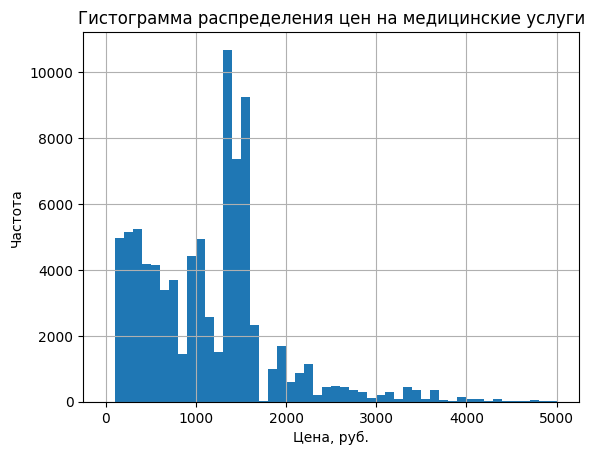

In [174]:
df['service_price'].hist(bins=50, range=(0, 5000));

plt.title('Гистограмма распределения цен на медицинские услуги')
plt.xlabel('Цена, руб.')
plt.ylabel('Частота')
plt.show()

В качестве границ условно примем:
- дешевые - до 1000 руб.,
- средние - от 1000 до 4000 руб.,
- дорогие - более 4000 руб.  

Для разделения по группам используем метод .cut().

In [175]:
df['price_category'] = pd.cut(df['service_price'],
    bins=[0, 1000, 4000, 27000],
    labels=['cheap', 'medium', 'expensive'])

df['price_category'].value_counts()

medium       48095
cheap        36763
expensive      490
Name: price_category, dtype: int64

Категоризируем возраст пациентов исходя из следующей идеи:
- младше 18 лет - дети,
- от 18 до 64 лет - взрослые,
- 65 лет и старше - пожилые.  

Для разнообразия используем функцию.


In [176]:
def age_categoty (age_for_service_date):
  if age_for_service_date < 18:
    return 'children'
  if age_for_service_date <= 64:
    return 'adults'
  return 'seniors'
df['age_category'] = df['age_for_service_date'].apply(age_categoty)
df['age_category'].value_counts()

adults      77693
children     6941
seniors       714
Name: age_category, dtype: int64

Разделим все медицинские услуги на категории:
- консультация (первичный или повторный прием врача любой специализации),
- лабораторные исследования (любые медицинские исследования, связанные с забором и биохимическим анализом в лабораторных условиях физиологических жидкостей и тканей человеческого организма),
- инструментальные исследования (обследования состояния организма пациентов при помощи специального медицинского оборудования - рентген, УЗИ, КТ, МРТ, эндоскопия м прочие),
- медицинские операции и манипуляции (мероприятия, направленные на восстановление жизнеспособности организма - хирургические, физиотерапевтические, санитарно-гигиенические и прочие).  

Для упрощения и ускорения работы воспользуемся помощью Excel. Создадим в исходном файле новый лист, скопируем на него уникальные наименования мед. процедур и в соседней колонке вручную укажем категорию каждой процедуры. Затем присоединим к нашему исходному датасету колонку с наивенованиями категорий.



In [177]:
df_categories = pd.read_excel('/content/data_test_task_2022.xlsx', sheet_name='service_category')
df = df.merge(df_categories, on='service_name')
df['service_category'].value_counts()

consultation             26365
laboratory tests         26111
treatment                16229
instrumental research    14501
Name: service_category, dtype: int64

Создадим колонки, в которыею добавим год и месяц посещения.

In [178]:
df['year'] = df['service_date'].dt.year
df['month'] = df['service_date'].dt.month
df['month_period'] = df['service_date'].dt.strftime('%Y-%m')

### Резюме подраздела.

Мы провели предварительную обработку данных:
- Аномальных значений в данных нет.
- Явные строки-дубликаты отсутствуют.
- Скорректировали неявные дубликаты в названиях медицинских процедур, уменьшив количество уникальных названий с 875 до 807.
- Исправили тип данных колонки с датами посещений.
- Удалили строки с пропусками.
- Привели к более удобному для чтения виду данные в колонке с полом пациентов.
- Категоризировали медицинские услуги в зависимости от их назначения и цены, а также пациентов в зависимости от их возраста. Добавили новые колонки в исходный датасет.

## Исследовательский анализ данных  



### Рассчитаем общую выручку медицинского центра.

In [179]:
print('Суммарная выручка за рассматриваемый период:', round(df['service_amount'].sum() / 1000000, 1), 'млн. руб.')

Суммарная выручка за рассматриваемый период: 97.2 млн. руб.


Оценим выручку за сопоставимые периоды 2021 и 2022 годов.

In [180]:
df_revenue = df.groupby(['year', 'month'])['service_amount'].sum().reset_index()
months=[9, 10, 11, 12]
df_revenue = df_revenue[~df_revenue['month'].isin(months)]
df_revenue = df_revenue.groupby('year')['service_amount'].sum().reset_index()
df_revenue

,year,service_amount
0,2021,29189666
1,2022,47851412


Запервые 8 месяцев 2021 года выручка составила 29,2 млн. руб.  
За аналогичный период 2022 года выручка выросла более чем в полтора раза - до 47,8 млн. руб.

Оценим динамику изменения выручки месяц к предыдущему месяцу и месяц к соответствующему месяцу предшествующего года.

In [181]:
monthly_revenue = df.groupby('month_period')['service_amount'].sum().reset_index()
monthly_revenue['mm_change_%'] = round(monthly_revenue['service_amount'].pct_change() * 100, 2)
monthly_revenue['yy_change_%'] = round(monthly_revenue['service_amount'].pct_change(periods=12) * 100, 2)


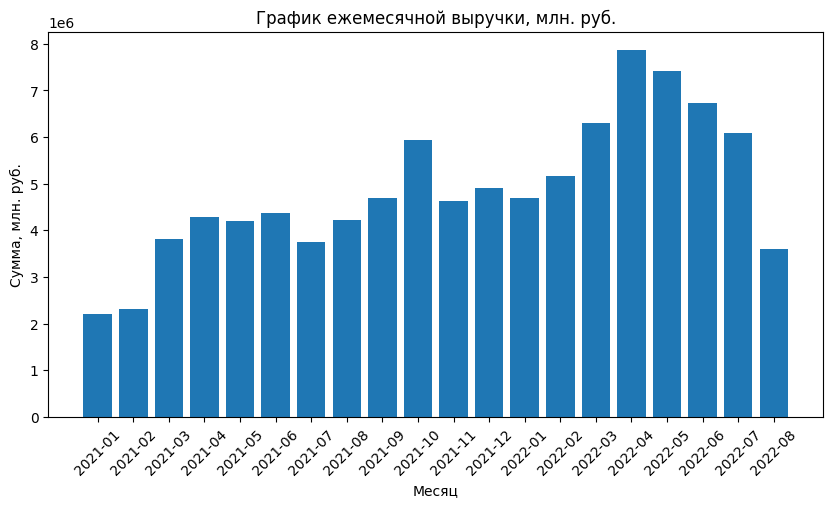

In [182]:
plt.figure(figsize=(10, 5))
plt.bar(monthly_revenue['month_period'], monthly_revenue['service_amount'])

plt.title('График ежемесячной выручки, млн. руб.')
plt.xlabel('Месяц')
plt.ylabel('Сумма, млн. руб.')
plt.xticks(rotation=45)

plt.show()

Мы видим, что выручка медицинского центра имела плавный восходящий тренд, достигнув своего максимума в апреле 2022 г. Затем начала снижаться примерно на 6 - 9% в месяц.

В январе и феврале 2022 г. выручка была более чем в два раза больше, чем в аналогичные периоды 2021 г.  
С марта по июль также наблюдаем существенное превышение ежемесячной выручки над аналогичными периодами.

 В августе 2022 г. видим резкое падение выручки - на 40% по сравнению с предыдущие месяцев и на 14% по сравнению с августом предшествуюшего года.  
Выясним причины снижения выручки в последние месяцы анализируемого периода.  


### Проверим, как влияет на выручку средняя стоимость облуживания пациентов.  

Рассчитаем сумму счета каждого пациента за один визит. Под визитом подразумеваем посещение пациентом медицинского центра в течение одного дня. Во время одного визита пациенту может быть оказано несколько медицинских услуг.  

In [183]:
avg_cost_daily = df.groupby([df['service_date'], df['insured']])['service_amount'].sum().reset_index()
avg_cost_daily.head()

,service_date,insured,service_amount
0,2021-01-03,142427,1313
1,2021-01-03,142562,1470
2,2021-01-03,174009,2784
3,2021-01-03,176359,5157
4,2021-01-03,194308,873


In [184]:
# Запомним первоначальное количество строк в датафрейме.
df_length_1 = avg_cost_daily.shape[0]

Проверим по графику boxplot наличие выбросов в колонке со стоимостью обслуживания.

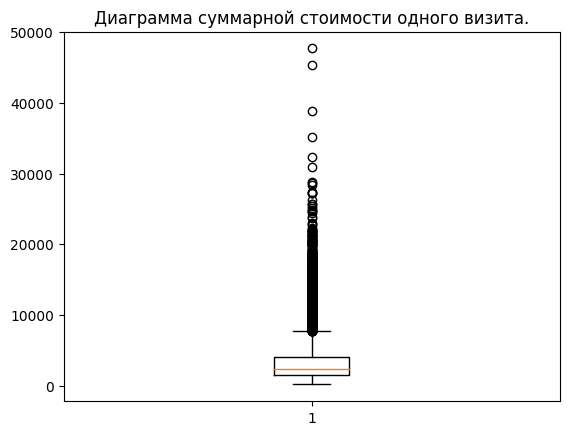

In [185]:
plt.boxplot(avg_cost_daily['service_amount'])

plt.title('Диаграмма суммарной стоимости одного визита.')
plt.show()

Есть выбросы, которые искажают среднее арифметическое значение. Избавимся от них.  
При помощи гистограммы оценим пороговое значение стоимости лечения, значения выше которой будем считать выбросами, которые необходимо удалить.  

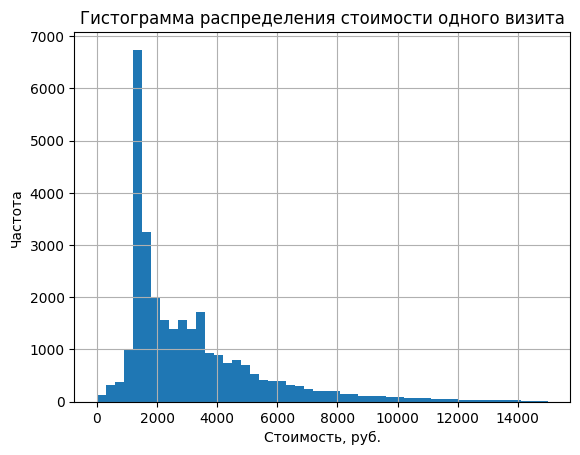

In [186]:
avg_cost_daily['service_amount'].hist(bins=50, range=(0, 15000))

plt.title('Гистограмма распределения стоимости одного визита')
plt.xlabel('Стоимость, руб.')
plt.ylabel('Частота')
plt.show()

Видим, что после стоимости 12 000 руб - уже единичные случаи. Примем значение 12 000 руб. за пороговое.  
Отфильтруем наш датафрейм.

In [187]:
avg_cost_daily = avg_cost_daily[avg_cost_daily['service_amount'] <= 12000]
#avg_cost_daily

Посмотрим на оставшееся количество строк и оценим потери.

In [188]:
df_length_2 = avg_cost_daily.shape[0]
print('Удалено', df_length_1-df_length_2, 'строк с выбросами, что составляет', round((df_length_1-df_length_2)/df_length_1 * 100, 2), '% от начального количества строк.')


Удалено 464 строк с выбросами, что составляет 1.53 % от начального количества строк.


Затем сгруппируем данные по месяцам и посчитаем среднее значение стоимости обслуживания за каждый месяц.  
Также рассчитаем динамику изменения этой стоимости в процентах по отношению к предыдущему месяцу и к аналогичному менсяцу предшествующего года.

In [189]:
avg_cost_daily['month_period'] = df['service_date'].dt.strftime('%Y-%m')
avg_cost_monthly = avg_cost_daily.groupby('month_period')['service_amount'].mean().reset_index()
avg_cost_monthly['mm_%_change'] = round(avg_cost_monthly['service_amount'].pct_change() * 100, 2)
avg_cost_monthly['yy_%_change'] = round(avg_cost_monthly['service_amount'].pct_change(12) * 100, 2)


Визуализируем полученные данные на графике.

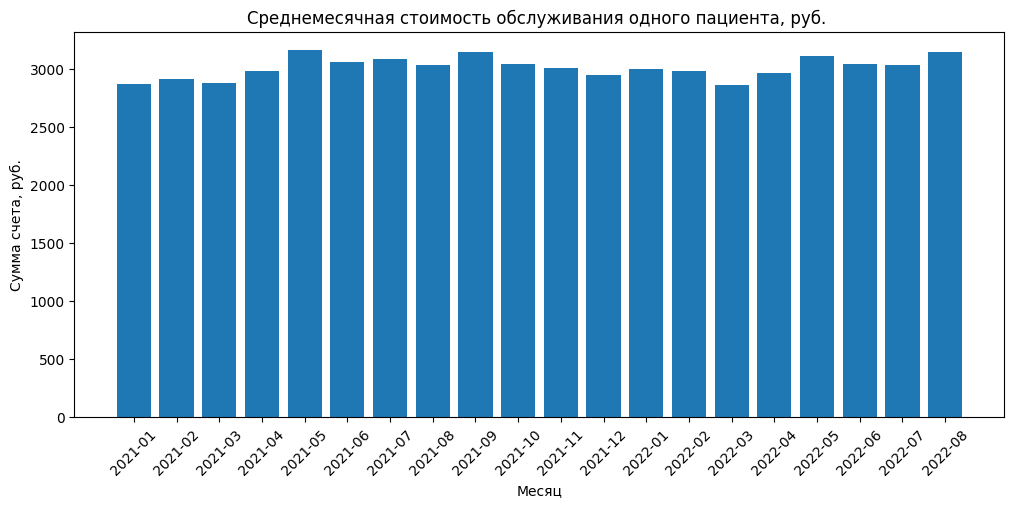

In [190]:
plt.figure(figsize=(12, 5))
plt.bar(avg_cost_monthly['month_period'], avg_cost_monthly['service_amount'])

plt.title('Среднемесячная стоимость обслуживания одного пациента, руб. ')
plt.xlabel('Месяц')
plt.ylabel('Сумма счета, руб.')
plt.xticks(rotation=45)

plt.show()

Как мы видим, величина среднего чека практически не меняется. Она варьируется от месяца к месяцу в пределах 5%.  
Можем сделать вывод, что снижение выручки в последние анализируемые месяцы не связано с изменением среднего чека пациентов.

### Проверим, как влияет на выручку количество визитов по месяцам.  

Оценим влияние количества посещений пациентов на выручку.  

Подсчитаем количество визитов в медицинский центр. Учтем только сами факты посещения, без учета количества оказанных услуг.  
Добавим расчет динамики изменения посещений в процентах по отношению к предыдущему месяцу и к аналогичному месяцу предшествующего года.


In [191]:
df_visits = df.groupby(['service_date', 'insured'])['insured'].nunique().reset_index(name='visits_cnt')
df_visits['month_period'] = df_visits['service_date'].dt.strftime('%Y-%m')
df_visits = df_visits.groupby('month_period')['visits_cnt'].sum().reset_index()
df_visits['mm_%_change'] = round(df_visits['visits_cnt'].pct_change() * 100, 2)
df_visits['yy+%_change'] = round(df_visits['visits_cnt'].pct_change(periods=12) * 100, 2)


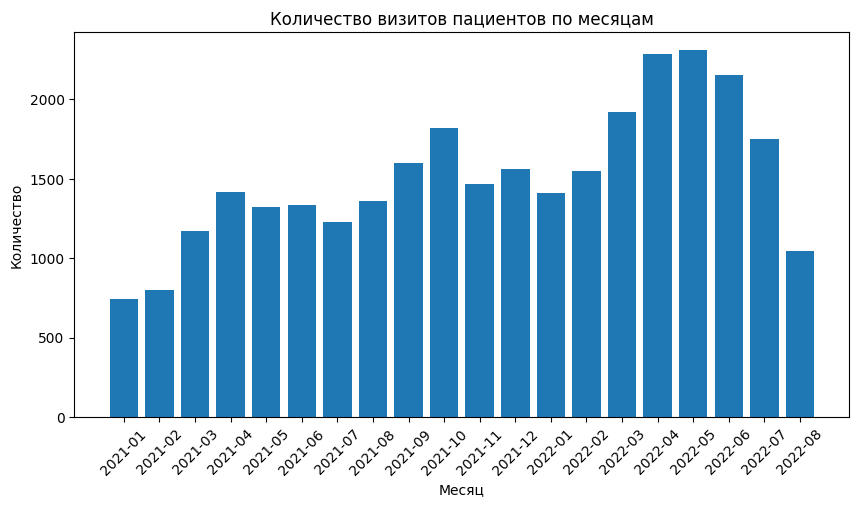

In [192]:
plt.figure(figsize=(10,5))
plt.bar(df_visits['month_period'], df_visits['visits_cnt'])
plt.title('Количество визитов пациентов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show;

График внешне очень похож на график выручки по месяцам. Можем предположить, что изменение выручки прямо связано с изменением посещаемости. Для подтверждения этой гипотезы рассчитаем коэффициент корреляции.

In [193]:
df_correlation = monthly_revenue.merge(df_visits, on='month_period')
correlation = df_correlation['service_amount'].corr(df_correlation['visits_cnt'])
print('Коэффициент корреляции равен', round(correlation, 3))

Коэффициент корреляции равен 0.988


Мы видим, что коэффициент корреляции является очень высоким. Это указывает на очень сильную положительную линейную связь между количеством визитов пациентов и выручкой.  
Можем сделать вывод, что на снижение выручки повлияло уменьшение количества посещений медицинского центра.

### Проверим, как влияет на выручку количество уникальных клиентов.

In [194]:
print('Общее количество уникальных клиентов за рассматриваемый период:', df['insured'].nunique(), 'пациентов.')

Общее количество уникальных клиентов за рассматриваемый период: 4486 пациентов.


In [195]:
unique_visitors = df.groupby('month_period')['insured'].nunique().reset_index()
unique_visitors['mm_change_%'] = round(unique_visitors['insured'].pct_change() * 100, 2)
unique_visitors['yy_change_%'] = round(unique_visitors['insured'].pct_change(periods=12) * 100, 2)


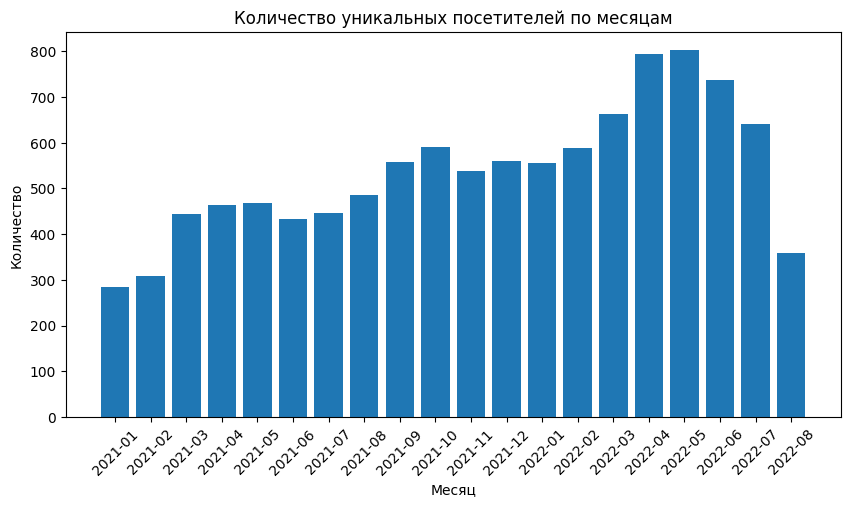

In [196]:
plt.figure(figsize=(10,5))
plt.bar(unique_visitors['month_period'], unique_visitors['insured'])

plt.title('Количество уникальных посетителей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.xticks(rotation=45)

plt.show()

График аналогичен графику выручки и графику посещений.
Рассчитаем коэффициент корреляции между количеством уникальных пациентов и выручкой.

In [197]:
df_correlation = monthly_revenue.merge(unique_visitors, on='month_period')
correlation = df_correlation['service_amount'].corr(df_correlation['insured'])
print('Коэффициент корреляции равен', round(correlation, 3))

Коэффициент корреляции равен 0.979


Зависимость выручки от количества уникальных пациентов примерно такая же, как и от общего количества визитов.  
В августе 2022 г. новых пациентов было на 26% меньше, чем в августе 2021 г.  
Можем сделать вывод, что падение выручки в последние месяцы анализируемого периода помимо общего снижения посещаемости связана с уменьшением количества новых пациентов.  


### Проверим, как влияет на выручку возрастной состав пациентов.  

Для выяснения причин уменьшения посещаемости, рассмотрим структуру наших пациентов.  
Сначала рассмотрим возрастной состав.

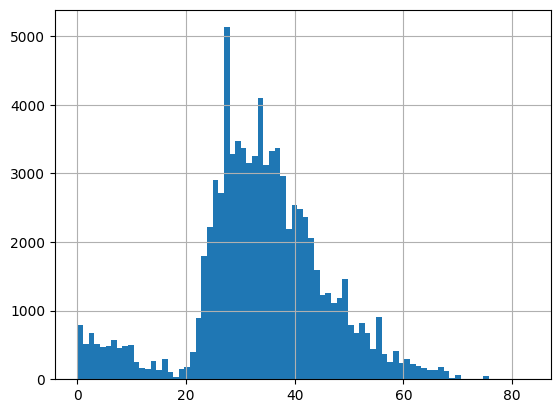

In [198]:
df['age_for_service_date'].hist(bins=80);

Видим, что наиболее частый возраст пациентов - примерно 25-37 лет.

In [199]:
age_pivot = df.pivot_table(index='month_period', columns='age_category', values='insured', aggfunc='count').reset_index()

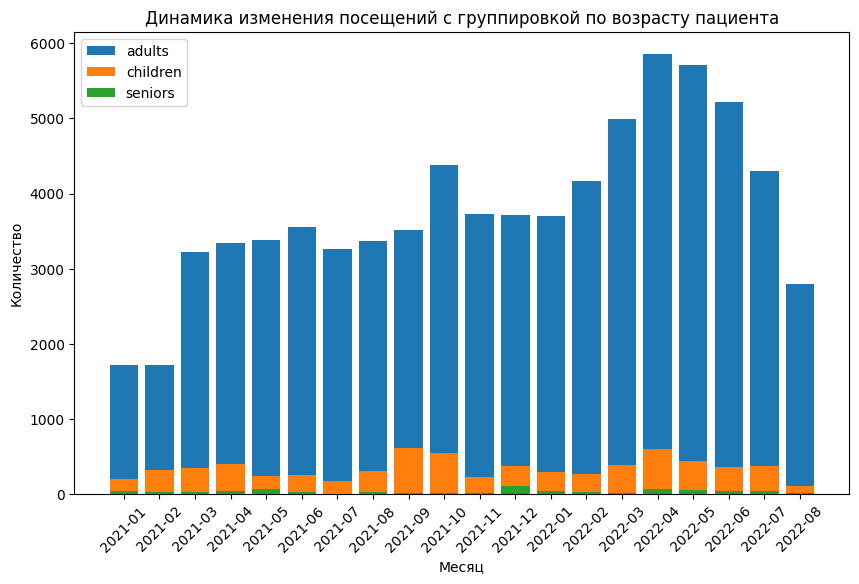

In [200]:
plt.figure(figsize=(10, 6))
plt.bar(age_pivot['month_period'], age_pivot['adults'], label='adults')
plt.bar(age_pivot['month_period'], age_pivot['children'], label='children')
plt.bar(age_pivot['month_period'], age_pivot['seniors'], label='seniors')

plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.title('Динамика изменения посещений с группировкой по возрасту пациента')
plt.xticks(rotation=45)
plt.legend()

plt.show()


Основным драйвером трафика с большим отрывом являются взрослые пациенты.  
Посмотрим на струкутуру выручки в зависимости от возраста пациентов.

In [201]:
age_df = df.groupby(['year', 'month', 'month_period', 'age_category'])['service_amount'].sum().reset_index()
age_df_sum = age_df.groupby('month_period')['service_amount'].sum().reset_index(name='service_amount_sum')
age_df = age_df.merge(age_df_sum, on='month_period')
age_df['monthly_share'] = round(age_df['service_amount'] / age_df['service_amount_sum'] * 100, 2)
#age_df

In [202]:
adults_share_2021 = age_df[(age_df['age_category'] == 'adults') & (age_df['year'] == 2021)]['monthly_share'].mean().round()
adults_share_2022 = age_df[(age_df['age_category'] == 'adults') & (age_df['year'] == 2022)]['monthly_share'].mean().round()
adults_sum_2021 = age_df[(age_df['age_category'] == 'adults') & (age_df['year'] == 2021) & (age_df['month'] <= 8)]['service_amount'].mean().round()
adults_sum_2022 = age_df[(age_df['age_category'] == 'adults') & (age_df['year'] == 2022)]['service_amount'].mean().round()

In [203]:
print('С января по август 2021 г. взрослых пациентов было в среднем', adults_share_2021, '% от общего количества.')
print('Им оказывались медицинские услуги в среднем на', round(adults_sum_2021/1000000, 2), 'млн. руб. ежемесячно.')
print()
print('За аналогичный период 2022 г. взрослых пациентов было в среднем', adults_share_2022, '%.')
print('Им были оказаны медицинские услуги в среднем на', round(adults_sum_2022/1000000, 2), 'млн. руб. ежемесячно.')

С января по август 2021 г. взрослых пациентов было в среднем 90.0 % от общего количества.
Им оказывались медицинские услуги в среднем на 3.3 млн. руб. ежемесячно.

За аналогичный период 2022 г. взрослых пациентов было в среднем 93.0 %.
Им были оказаны медицинские услуги в среднем на 5.53 млн. руб. ежемесячно.


В среднем за весь анализируемый период более 90% пациентов - взрослые пациенты в возрасте от 18 до 65 лет. Остальные возрастные группы не имеют существенного влияния.  
Средняя ежемесячная выручка со взрослых пациентов в 2022 г. увеличилась по сравнению с 2021 г.

### Проверим, как влияет на выручку пол пациентов.
Рассмотрим половой состав пациентов, а также динамику его изменения.

In [204]:
sex_pivot = df.pivot_table(index='month_period', columns='sex_id', values='insured', aggfunc='count').reset_index()
sex_pivot['female_share'] = sex_pivot['female'] / (sex_pivot['female'] + sex_pivot['male'])
sex_pivot['male_share'] = sex_pivot['male'] / (sex_pivot['female'] + sex_pivot['male'])
sex_pivot['female_mm_%_change'] = round(sex_pivot['female'].pct_change() * 100, 2)
sex_pivot['female_yy_%_chanhe'] = round(sex_pivot['female'].pct_change(12) * 100, 2)
sex_pivot['male_mm_%_change'] = round(sex_pivot['male'].pct_change() * 100, 2)
sex_pivot['male_yy_%_chanhe'] = round(sex_pivot['male'].pct_change(12) * 100, 2)

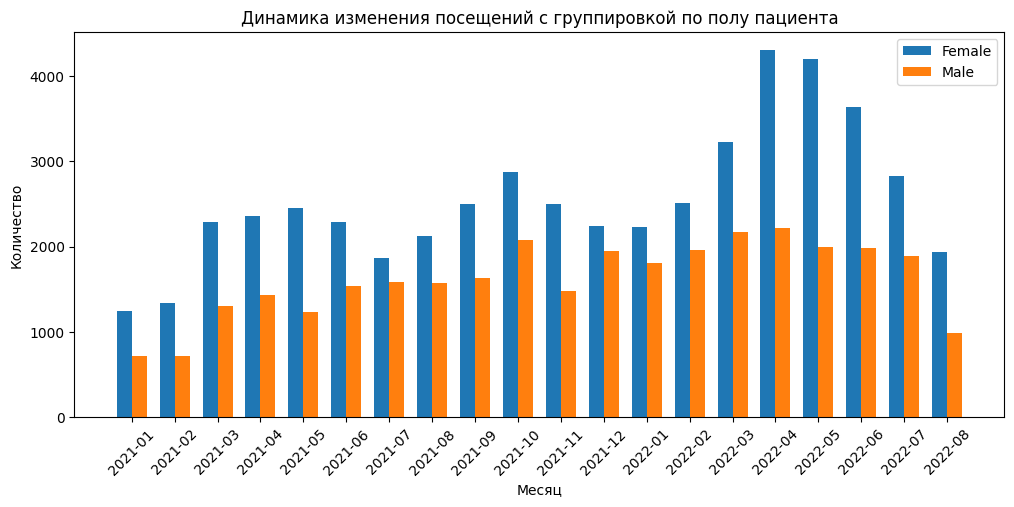

In [205]:
month_period = sex_pivot['month_period']
female = sex_pivot['female']
male = sex_pivot['male']

bar_width = 0.35

index = range(len(month_period))

plt.figure(figsize=(12, 5))
plt.bar(index, female, bar_width, label='Female')
plt.bar([i + bar_width for i in index], male, bar_width, label='Male')

plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.title('Динамика изменения посещений с группировкой по полу пациента')
plt.xticks([i + bar_width/2 for i in index], month_period,rotation=45)
plt.legend()

plt.show()

In [206]:
sex_pivot_2021 = sex_pivot.loc[:11]
f_count_2021 = sex_pivot_2021['female'].mean().round()
m_count_2021 = sex_pivot_2021['male'].mean().round()

print('Среднемесячное количество пациентов-женщин в 2021 г.:',f_count_2021, 'человек, что составляет', round(f_count_2021 / (f_count_2021 + m_count_2021)*100, 1), '%' )
print('Среднемесячное количество пациентов-мужчин в 2021 г.:',m_count_2021, 'человек, что составляет', round(m_count_2021 / (f_count_2021 + m_count_2021)*100, 1), '%' )

Среднемесячное количество пациентов-женщин в 2021 г.: 2174.0 человек, что составляет 60.2 %
Среднемесячное количество пациентов-мужчин в 2021 г.: 1435.0 человек, что составляет 39.8 %


In [207]:
sex_pivot_2022 = sex_pivot.loc[12:]
f_count_2022 = sex_pivot_2022['female'].mean().round()
m_count_2022 = sex_pivot_2022['male'].mean().round()

print('Среднемесячное количество пациентов-женщин в 2022 г.:',f_count_2022, 'человек, что составляет', round(f_count_2022 / (f_count_2022 + m_count_2022)*100, 1), '%' )
print('Среднемесячное количество пациентов-мужчин в 2022 г.:',m_count_2022, 'человек, что составляет', round(m_count_2022 / (f_count_2022 + m_count_2022)*100, 1), '%' )

Среднемесячное количество пациентов-женщин в 2022 г.: 3109.0 человек, что составляет 62.3 %
Среднемесячное количество пациентов-мужчин в 2022 г.: 1878.0 человек, что составляет 37.7 %


Как мы видим, женщин среди пациентов стабильно больше, чем мужчин.  
С января по июль 2022 г. приходило существенно больше пациентов обоего пола, чем в аналогичные месяцы 2021 г.  
Однако, в августе 2022 г. количество посетителей заметно снизилось - женщин пришло почти на 9% меньше, а мужчин - на 37%.  

In [208]:
rev_corr = sex_pivot.merge(monthly_revenue, on='month_period')

female_corr = rev_corr['female'].corr(rev_corr['service_amount'])
male_corr = rev_corr['male'].corr(rev_corr['service_amount'])

print('Корреляция между посещениями пациентами-женщинами и выручкой:', round(female_corr, 3))
print('Корреляция между посещениями пациентами-мужчинами и выручкой:', round(male_corr, 3))

Корреляция между посещениями пациентами-женщинами и выручкой: 0.969
Корреляция между посещениями пациентами-мужчинами и выручкой: 0.897


Мы установили, что женщины имеют большее влияние на генерацию выручки, чем мужчины.

### Проверим, есть ли корреляция между выручкой и внешними экономическими факторами.

Предположим, что пациенты стали меньше приходить из-за изменения экономической обстановки в стране. Косвенно нам поможет проверить эту гипотезу сравнение динамики выручки с динамикой курса доллара США и ключевой ставки Центрального Банка РФ.  
Для этот возьмем эти финансовые данные с сайта ЦБ РФ, добавим их на отдельный лист в нашем исходном файле и сформируем общий датафрейм.

In [209]:
df_currency = pd.read_excel('/content/data_test_task_2022.xlsx', sheet_name='currency')


In [210]:
df_revenue = df.groupby('service_date')['service_amount'].sum().reset_index()
df_revenue = df_revenue.merge(df_currency, on='service_date')

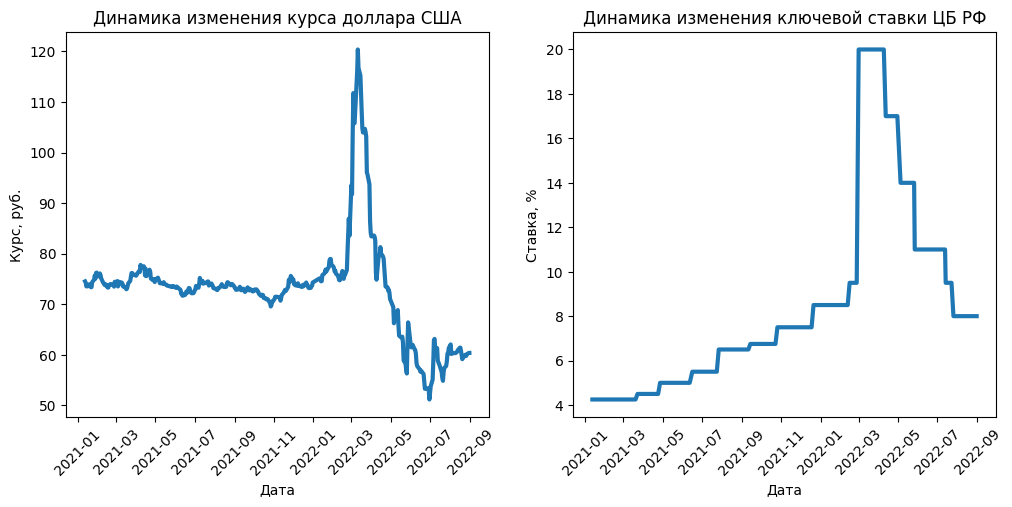

In [211]:
x = df_revenue['service_date']
y1 = df_revenue['usd']
y2 = df_revenue['key_rate']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y1, linewidth=3)
plt.title('Динамика изменения курса доллара США')
plt.xlabel('Дата')
plt.ylabel('Курс, руб.')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.plot(x, y2, linewidth=3)
plt.title('Динамика изменения ключевой ставки ЦБ РФ')
plt.xlabel('Дата')
plt.ylabel('Ставка, %')
plt.xticks(rotation=45)

plt.show();

In [ ]:
usd_corr = df_revenue['service_amount'].corr(df_revenue['usd'])
print('Коэффициент корреляции между выручкой и куросм доллара равен', round(usd_corr, 3))

In [212]:
key_rate_corr = df_revenue['service_amount'].corr(df_revenue['key_rate'])
print('Коэффициент корреляции между выручкой и ключевой ставкой равен', round(key_rate_corr, 3))

Коэффициент корреляции между выручкой и ключевой ставкой равен 0.64


Корреляции между выручкой и курсом доллара нет.  
Есть умеренная положительная корреляция между выручкой и ключевой ставкой.

In [213]:
df_insured = df.groupby('service_date')['insured'].nunique().reset_index(name='insured_count')
df_insured = df_insured.merge(df_currency, on='service_date')
ins_corr = df_insured['insured_count'].corr(df_insured['key_rate'])
print('Коэффициент корреляции между посещаемостью и ключевой ставкой равен', round(ins_corr, 3))

Коэффициент корреляции между посещаемостью и ключевой ставкой равен 0.642


Корреляция между посещаемостью и ключевой ставкой примерно такая же, как и между выручкой и ключевой ставкой.  

Повышение ключевой ставки ЦБ, как правило, обусловлено желанием взять под контроль и снизить инфляцию. Однако вместе с тем высокая ставка несет и негативные последствия: покупательная способность населения и темпы развития экономики снижаются.  

На графиках мы можем увидеть пики, приходящиеся на март - апрель 2022 года.

На графике выручки пик приходится примерно на эти же месяцы с небольшим сдвигом вперед - апрель - май.  

Можем осторожно предположить, что при резком увеличении ключевой ставки, люди ожидали роста цен на товары и услуги (в том числе и медицинские) и могли принять решение инвестировать имеющиеся деньги во избежание их ускоренного обесценивания в свой главнй актив - свое здоровье. Это и могло обусловить возросшую посещаемость медицинского центра в эти месяы, что повлекло за собой соответствующий рост выручки.  
В дальнейшем, со стабилизацией экономической ситуации в стране, ключевую ставку существенно понизили, что могло умерить пыл покупательской активности.


### Рассмотрим структуру выручки по половозрастным категориям.
Определим. какие категории пациентов и медицинских услуг принесли наибольший доход в анализируемом периоде.

In [214]:
pivot_df = df.pivot_table(index=['age_category', 'sex_id'], columns='service_category', values='service_amount', aggfunc='sum')

In [215]:
# Представим эту же таблицу в виде процентов от общей выручки.
total_sum = pivot_df.sum().sum()
percent_df = pivot_df.apply(lambda x: (x / total_sum) * 100)

Визуализируем полученные данные на тепловой карте.

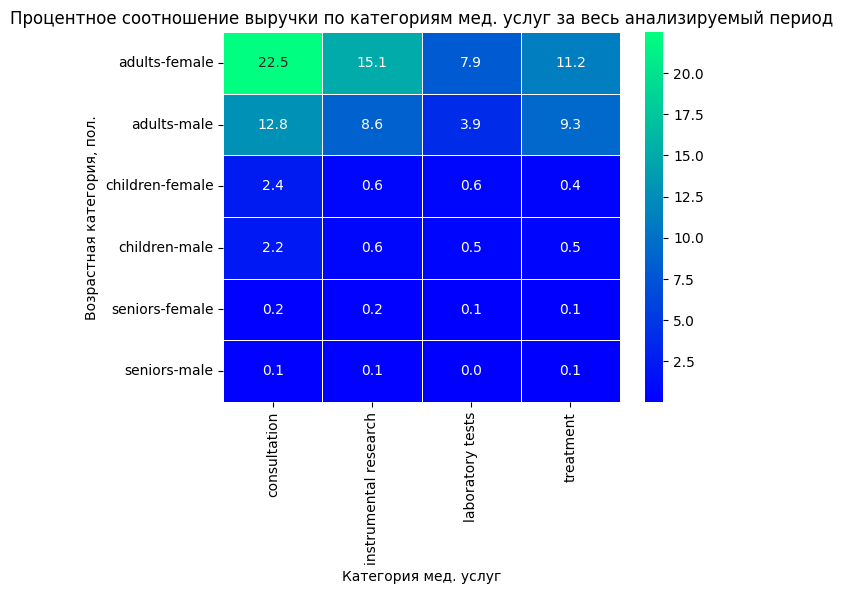

In [216]:
sns.heatmap(percent_df, cmap='winter', annot=True, fmt=".1f", linewidth=.5)

plt.xlabel('Категория мед. услуг')
plt.ylabel('Возрастная категория, пол.')
plt.title('Процентное соотношение выручки по категориям мед. услуг за весь анализируемый период')

plt.show()

Составим такие же тепловые карты за соспоставимые периоды 2021 и 2022 годов и посмотрим, как менялась структура услуг в зависимости от пола и возраста.

In [217]:
df2021 = df[(df['year'] == 2021) & (df['month'] <= 8)]
pivot_df_2021 = df2021.pivot_table(index=['age_category', 'sex_id'], columns='service_category', values='service_amount', aggfunc='sum')


In [218]:
total_sum_2021 = pivot_df_2021.sum().sum()
percent_df_2021 = pivot_df_2021.apply(lambda x: (x / total_sum_2021) * 100)


In [219]:
df2022 = df[df['year'] == 2022]
pivot_df_2022 = df2022.pivot_table(index=['age_category', 'sex_id'], columns='service_category', values='service_amount', aggfunc='sum')

In [220]:
total_sum_2022 = pivot_df_2022.sum().sum()
percent_df_2022 = pivot_df_2022.apply(lambda x: (x / total_sum_2022) * 100)

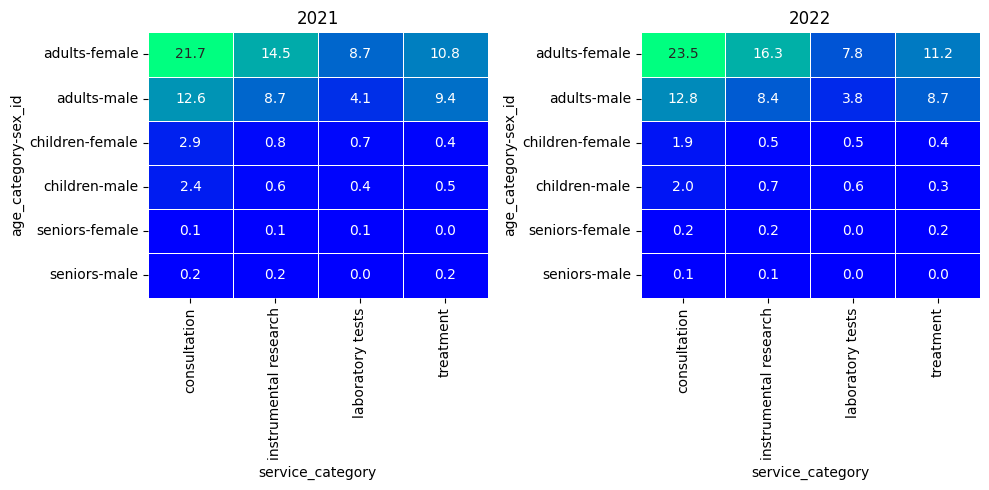

In [221]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(percent_df_2021, cmap='winter', ax=axes[0], cbar=False, annot=True, fmt=".1f", linewidth=.5)
axes[0].set_title('2021')

sns.heatmap(percent_df_2022, cmap='winter', ax=axes[1], cbar=False, annot=True, fmt=".1f", linewidth=.5)
axes[1].set_title('2022')

plt.tight_layout()
plt.show()

Как мы видим, распределение структур по годам во многом похожи.  
Можем заметить, что в 2022 году примерно на 1,5% увеличились доли выручки, приходящиеся на взрослых женщин на консультации врачей и инструментальные исследования

### Рассмотрим динамику изменения цен медицинских услуг.  

Рассмотрим, менялись ли цены на медицинские услуги.  
Сначала посмотрим диаграмму рассеяния.

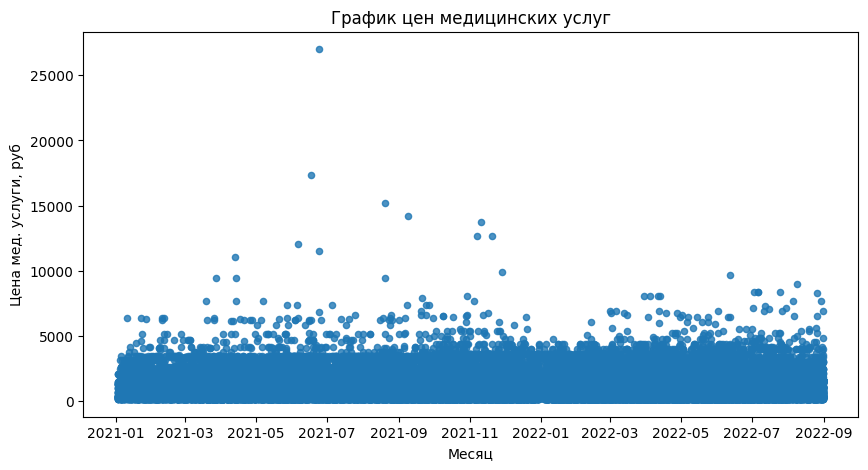

In [222]:
df.plot(x='service_date', y='service_price', kind='scatter', alpha=0.8, figsize=(10,5), title='График цен медицинских услуг')

plt.xlabel('Месяц')
plt.ylabel('Цена мед. услуги, руб')
plt.show();

Не видим, что цена на медицинские услуги существенно менялись. Они в среднем на одном уровне.  

Рассмотрим детальнее. Составим список услуг, которые обязательно производились в каждом месяце в анализируемом периоде и проследим за изменением цен на них.

In [ ]:
grouped = df.groupby(['month_period', 'service_name'])['service_name'].nunique().reset_index(name='names_cnt')
grouped = grouped.groupby('service_name')['names_cnt'].sum().reset_index()
grouped = grouped[grouped['names_cnt'] == grouped['names_cnt'].max()]

filtered_names = grouped['service_name'].tolist()

In [223]:
grouped = df[df['service_name'].isin(filtered_names)].groupby(['service_name', 'month_period'])['service_price'].mean().unstack().transpose()

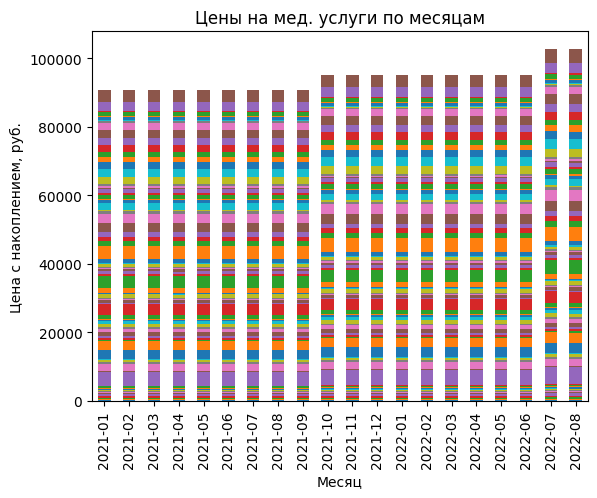

In [224]:
grouped.plot.bar(stacked=True)

plt.xlabel('Месяц')
plt.ylabel('Цена с накоплением, руб.')
plt.title('Цены на мед. услуги по месяцам')
plt.legend().remove()

plt.show()

На графике видны две "ступеньки" - повышения цен на мед. услуги были в октябре 2021 г. и июле 2022 г.  

Выберем из каждой категории медицинских услуг по две наиболее частые и проанализируем этот список.

In [ ]:
top_service_names = df.groupby('service_category')['service_name'].apply(lambda x: x.value_counts().nlargest(2)).reset_index(level=0, drop=True).index.tolist()
top_service_names

In [225]:
top_service = df[df['service_name'].isin(top_service_names)].groupby(['service_name', 'month_period'])['service_price'].mean().unstack().transpose()

top_service['total'] = top_service.sum(axis=1)
top_service['mm_%_change'] = top_service['total'].pct_change()*100
top_service = top_service[['total', 'mm_%_change']]
top_service

service_name,total,mm_%_change
month_period,,
2021-01,6680.0,NaN
2021-02,6680.0,0.0
2021-03,6680.0,0.0
2021-04,6680.0,0.0
2021-05,6680.5,0.0
2021-06,6680.0,-0.0
2021-07,6680.0,0.0
2021-08,6680.0,0.0
2021-09,6680.0,0.0


Как мы видим, повышения цен в среднем малозаметное - всего в среднем примерно
на 5% на самые популярные услуги.   
В октябре 2011 г. произошло повышение цен и в этот же месяц мы видим локальный максимум на графике посещений.  
Можем сделать вывод, что повышение цен на медицинские услуги не являлось причиной снижения посещаемости.

### Рассмотрим динамику изменения выручки по категориям услуг.

Раммсотрим, как менялась выручка по категориям услуг за сопоставимые периоды 2021 и 2022 годов (с января по август).

In [226]:
df_services = df.pivot_table(index='service_category', columns='month_period', values='service_price', aggfunc='sum').transpose().reset_index()
df_services = df_services.drop(df_services.index[8:12])
df_services['consultation_%'] = df_services['consultation'].pct_change(8)*100
df_services['instr_research_%'] = df_services['instrumental research'].pct_change(8)*100
df_services['lab_tests_%'] = df_services['laboratory tests'].pct_change(8)*100
df_services['treatment_%'] = df_services['treatment'].pct_change(8)*100


In [227]:
df_services_2021 = df_services.loc[:7]
print('Выручка по категории consultation в 2021 г.', df_services_2021['consultation'].sum(), 'руб.')
print('Выручка по категории instrumental research в 2021 г.', df_services_2021['instrumental research'].sum(), 'руб.')
print('Выручка по категории laboratory tests в 2021 г.', df_services_2021['laboratory tests'].sum(), 'руб.')
print('Выручка по категории treatment в 2021 г.', df_services_2021['treatment'].sum(), 'руб.')

Выручка по категории consultation в 2021 г. 11623879.0 руб.
Выручка по категории instrumental research в 2021 г. 7094819.0 руб.
Выручка по категории laboratory tests в 2021 г. 3951389.0 руб.
Выручка по категории treatment в 2021 г. 6066786.0 руб.


In [228]:
df_services_2022 = df_services.loc[8:]
print('Выручка по категории consultation в 2022 г.', df_services_2022['consultation'].sum(), 'руб.')
print('Выручка по категории instrumental research в 2022 г.', df_services_2022['instrumental research'].sum(), 'руб.')
print('Выручка по категории laboratory tests в 2022 г.', df_services_2022['laboratory tests'].sum(), 'руб.')
print('Выручка по категории treatment в 2022 г.', df_services_2022['treatment'].sum(), 'руб.')

Выручка по категории consultation в 2022 г. 19330515.0 руб.
Выручка по категории instrumental research в 2022 г. 12259945.0 руб.
Выручка по категории laboratory tests в 2022 г. 5864959.0 руб.
Выручка по категории treatment в 2022 г. 9832667.0 руб.


Для упрощения анализа рассчитаем процент изменения выручки категорий медицинских услуг в аналогичные месяцы.

In [229]:
df_services_temp = df_services[['consultation_%', 'instr_research_%', 'lab_tests_%', 'treatment_%']]
df_services_temp = df_services_temp.drop(df_services.index[0:8])
df_services_temp = df_services_temp.set_index([pd.Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])])
df_services_temp = df_services_temp.rename_axis('month')

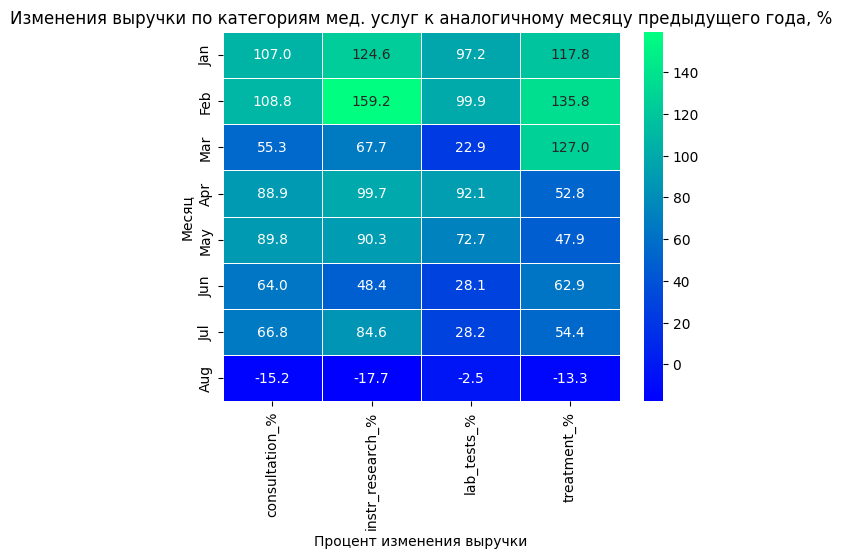

In [230]:
sns.heatmap(df_services_temp, cmap='winter', annot=True, fmt=".1f", linewidth=.5);

plt.xlabel('Процент изменения выручки')
plt.ylabel('Месяц')
plt.title('Изменения выручки по категориям мед. услуг к аналогичному месяцу предыдущего года, %');

plt.show()

Наиболее заметный рост виден в январе и феврале. Все категории мед. услуг принесли выручку, предвышающую показатели предшествующего года в два раза и более.  
С января по июль все категории демонстрируют существенный рост выручки
Наибольший рост за 7 первых месяцев продемонстрировала группа инструментальных исследований.  
В августе 2022 года все группы принесли меньше выручки, чем в августе 2021 года. Наименьшее сокращение выручки в этот месяц продемонстрировала группа лабораторных исследований.

### Рассмотрим изменение структуры услуг, сгруппированных по уровню цен.

In [ ]:
df_cut = df[(df['year'] == 2021) & (df['month'] < 9) | (df['year'] == 2022)]
df_price_cat = df_cut.groupby(['year', 'price_category'])['service_amount'].sum().reset_index()
df_price_cat['category_share'] = df_price_cat.groupby('year')['service_amount'].transform(lambda x: x.div(x.sum()))

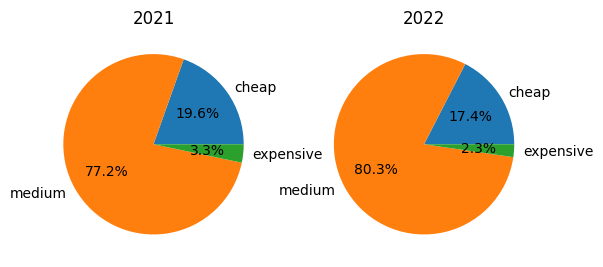

In [231]:
plot_2021 = df_price_cat[df_price_cat['year'] == 2021]
plot_2022 = df_price_cat[df_price_cat['year'] == 2022]

plt.subplot(1, 2, 1)
plt.pie(plot_2021['service_amount'], labels=plot_2021['price_category'], autopct='%1.1f%%')
plt.title('2021')

plt.subplot(1, 2, 2)
plt.pie(plot_2022['service_amount'], labels=plot_2022['price_category'], autopct='%1.1f%%')
plt.title('2022')

plt.show()

В 2022 году примерно на 2% уменьшилась доля дешевых мед. услуг и на 1% - доля дорогих услуг. Доля мед. услуг средней ценовой категории, соответственно, увеличилась примерно на 3%.

### Проведем ABC-анализ медицинских услуг.

Выясним, какие медицинские услуги являются наиболее востребованными у пациентов. А также выясним, какие услуги принесли наибольший доход. Для этого проведем двумерный ABC-анализ.   
Сначала разделим мед. услуги на группы по количеству. Затем аналогичным образом - по сумме.

Сгруппируем данные по наименованиям услуг и посчитаем, сколько эти услуги в сумме востребовались пациентами за анализируемый период. Затем рассчитаем вклад каждой из этих услуг, сортируем их по убыванию и рассчитаем сумму с накоплением.  
После этого разделим весь ассортимент услуг на группы в классической пропорции 80/15/5.

In [232]:
abc_cnt = df.groupby('service_name')['service_number'].sum().reset_index().sort_values(by='service_number', ascending=False)
abc_cnt['share'] = abc_cnt['service_number'] / abc_cnt['service_number'].sum()
abc_cnt['cumsum'] = abc_cnt['share'].cumsum()
abc_cnt['abc_cnt'] = np.where(abc_cnt['cumsum'] < 0.8, 'A', np.where(abc_cnt['cumsum'] < 0.95, 'B', 'C'))


Аналоично проведем ABC-анализ по сумме продаж.

In [233]:
abc_sum = df.groupby('service_name')['service_amount'].sum().reset_index().sort_values(by='service_amount', ascending=False)
abc_sum['share'] = abc_sum['service_amount'] / abc_sum['service_amount'].sum()
abc_sum['cumsum'] = abc_sum['share'].cumsum()
abc_sum['abc_sum'] = np.where(abc_sum['cumsum'] < 0.8, 'A', np.where(abc_sum['cumsum'] < 0.95, 'B', 'C'))


Сформируем итоговую таблицу, в которую включим колонки с количеством продаж, суммой продаж и соотвтетствующие им категории.

In [234]:
abc = abc_cnt.merge(abc_sum, on='service_name')
abc = abc[['service_name', 'service_number', 'abc_cnt', 'service_amount', 'abc_sum']]
abc

,service_name,service_number,abc_cnt,service_amount,abc_sum
0,прием первичный,15034,A,22892210,A
1,прием повторный,10943,A,14908196,A
2,взятие крови из периферической вены,4231,A,707630,A
3,"общий анализ крови (лейкоцитарная форм,, соэ)",3189,A,2306416,A
4,магнитотерапия (1 сеанс),2838,A,3056280,A
...,...,...,...,...,...
771,"вакцинация вакциной ""варилрикс""",1,C,4600,C
772,репозиция отломков костей при переломах 2 категория сложности,1,C,4960,C
773,репозиция отломков костей при переломах 3 категория сложности,1,C,6615,C
774,боррелия (burgdorferi) igg,1,C,690,C


Эти данные будут полезны менеджеру по маркетингу. К примеру, мы можем вывести список услуг, которые не самые востребованные среди пациентов, но приносят хорошую прибыль, и продвинуть их - дать рекламу о выдающихся результатах лечения главными специалистами или об уникальном эффектре аппарата "ярило-синхро".

In [235]:
abc[(abc['abc_cnt'] == 'B') & (abc['abc_sum'] == 'A')]

,service_name,service_number,abc_cnt,service_amount,abc_sum
61,ударно-волновая терапия (1 сеанс),234,B,593868,A
63,рентгенография пояснично-крестцового отдела позвоночника (2 снимка),222,B,372770,A
65,ультразвуковое исследование почек и мочевого пузыря,217,B,474840,A
67,"сеанс sis терапии, длинный цикл, 1 зона",213,B,757995,A
69,"прием главного специалиста, врача - эксперта",200,B,791650,A
70,дуплексное сканирование вен нижних конечностей,199,B,547285,A
78,расшифровка холтеровского мониторирования экг,175,B,517435,A
80,мануальная терапия (2 сегмента),157,B,390662,A
93,ультразвуковое исследование предстательной железы (трансректально),132,B,335530,A
100,гастроскопия с забором биопсии или лечебной манипуляцией,114,B,495751,A


## Выводы и рекомендации


В ходе анализа данных о коммерческой деятельности медицинского центра в период с 01 января 2021 по 31 августа 2022 г. мы пришли **к следующим выводам**:

1. Общая выручка за весь анализируемый период составила 97,2 млн. руб.
2. Выручка за 2022 год в 1,6 раз превышает выручку аналогичного периода 2022 года.
3. До апреля 2022 года наблюдался плавный восходящий тренд роста выручки.
4. В августе 2022 года произошло резкое падение выручки - на 40% по сравнению с предыдущие месяцев и на 14% по сравнению с августом 2021 года.
5. Средняя стоимость обслуживания пациентов в течение анализируемого периода варьировалась в пределах лишь 5% и не могла оказать существенного влияния на выручку.
6. В течение анализируемого периода администрация мед. центра два раза поднимала цены на услуги - в октябре 2021 г. и в июле 2022 г. Оба повышения цен были примерно на 5 - 6%, что вряд ли могло вызвать недовольство пациентов и их отток.
7. Между выручкой и количеством пациентов обнаружили сильную положительную линейную связь (коэффициент Пирсона = 0,988). Падение выручки вызвано уменьшением количества пациентов.
8. Между выручкой и количеством новых пациентов также сильная положительная линейная связь (коэффициент Пирсона = 0,979). Падение выручки также связано с уменьшающимся количеством новых пациентов.
9. Наибольший вклад в генерирование выручки дают пациенты в возрасте от 18 до 65 лет. Их доля в 2021 г. составляла 90% от всех пациентов, а в 2022 году их доля возросла до 93%.
10. Большая часть пациентов - женщины (более 60% от общего количества в среднем за месяц в 2021 г и более 62% от общего количества в среднем за месяц в 2022 г. В связи с этим они оакзывают несколько большее влияние на генерирование выручки, чем мужчины.
11. Корреляция между выручкой и курсом доллара США отсутствует.
12. Есть умеренная корреляция между выручкой и ключевой ставкой ЦБ РФ (коэффициент Пирсона = 0.642). Пик посещаемости мед. центра пациентами совпадает с пиком резкого увеличения ключевой ставки. Можем предположить, что Всплеск посещаемости связан с ожиданием пациентов ухудшения экономической ситуации в стране, скорым ростом цен в т.ч. на медицинские услуги, желанием форсировать получение медицинских услуг. Вскоре последовало ступенчатое снижение ключевой ставки до уровня начала 2022 года, что могло свидетельствовать о стабилизации экономической ситуации в стране, но большая часть пациентов уже реализовало свои потребности в медицинских услугах и это вызвало пониженный трафик в августе 2022 г.
13. Наибольшую сумму выручки демонстрирует категория услуг "консультации", наименьшую - "лабораторные исследования".
14. Наибольшее количество оказанных медицинских услуг относится к средней ценовой категории (ценай от 1000 до 4000 руб.)








Также можем дать следующие **рекомендации**:

1. Дополнить данные информацией за последующие месяцы после августа 2022 года, когда они станут известны, и провести дополнительный анализ для уточнения нашего предположения о причинно-следственной связи между дневной выручкой и ключевой ставкой ЦБ РФ.
2. Использовать результаты ABC-анализа службой маркетинга для поиска и продвижения перспетивных медицинских услуг.
3. Дополнить имеющиеся данные информацией о затратах для оценки рентабельности и маржинальности экономической деятельности.


